<a href="https://colab.research.google.com/github/panks11/CE888/blob/main/labs/lab5/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [35]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df["y"] = data.target.copy()  # ... ## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [36]:
df.shape

(178, 14)

In [37]:
# How many samples and features are there?
df.shape
# YOUR CODE HERE
print("number of samples:", df.shape[0], "number of features:", df.shape[1] - 1)

number of samples: 178 number of features: 13


In [38]:
# Quiz Q1
# How many instances are there for each class?

# YOUR CODE HERE
df["y"].value_counts()

1    71
0    59
2    48
Name: y, dtype: int64

In [39]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [61]:
df[["alcohol", "hue"]].corr().iloc[1, 0]

-0.0717471973301557

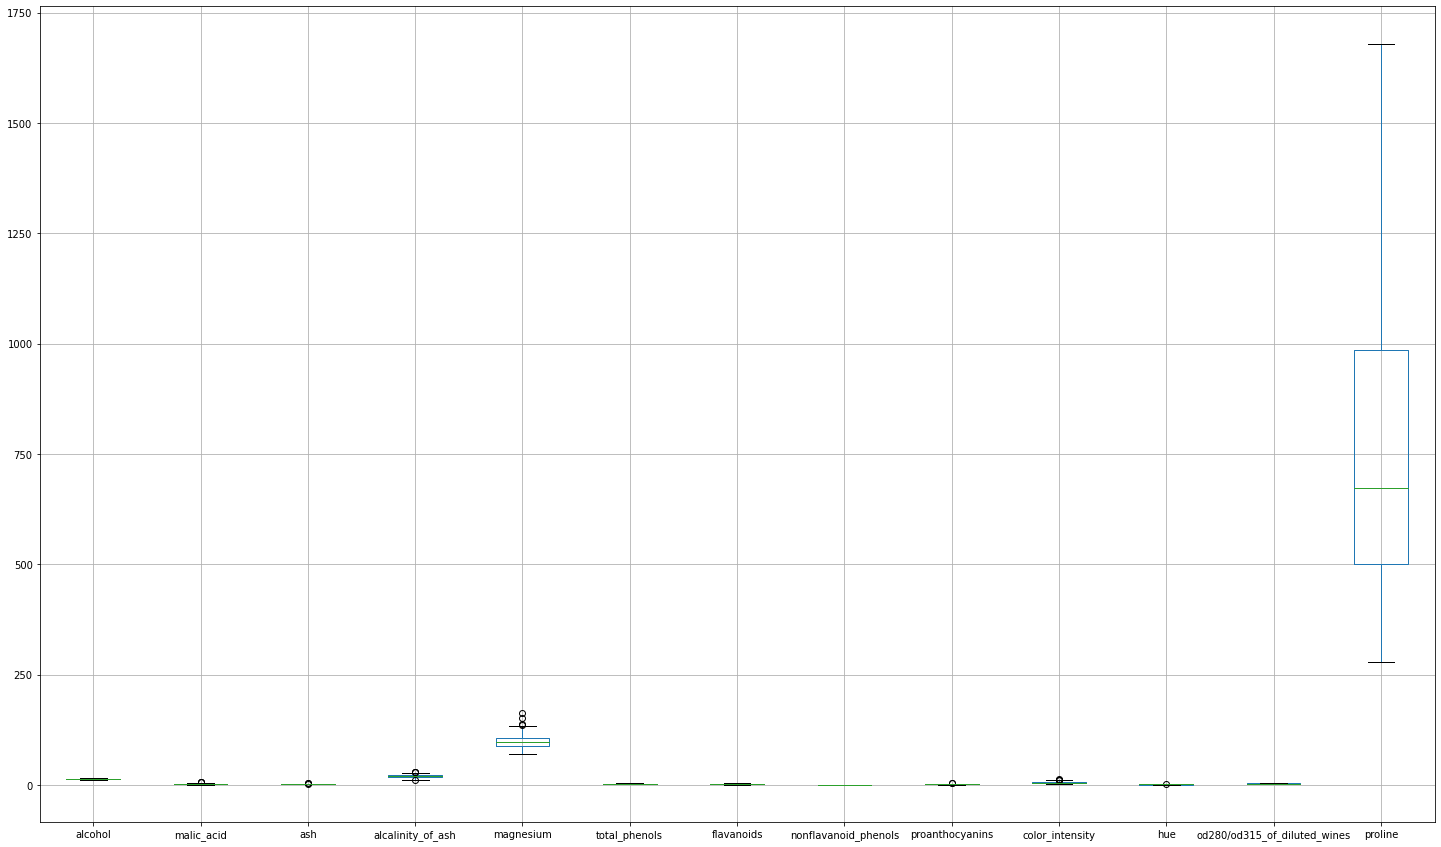

In [40]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
df.boxplot(
    column=[
        "alcohol",
        "malic_acid",
        "ash",
        "alcalinity_of_ash",
        "magnesium",
        "total_phenols",
        "flavanoids",
        "nonflavanoid_phenols",
        "proanthocyanins",
        "color_intensity",
        "hue",
        "od280/od315_of_diluted_wines",
        "proline",
    ],
    figsize=(25, 15),
)
# YOUR CODE HERE

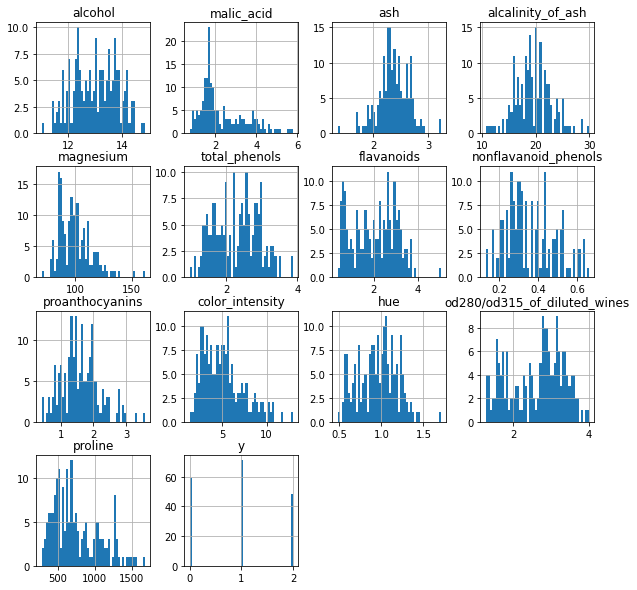

In [41]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
df.hist(bins=50, figsize=(10, 10))
plt.show()
# YOUR CODE HERE

Let's do some multivariate analysis

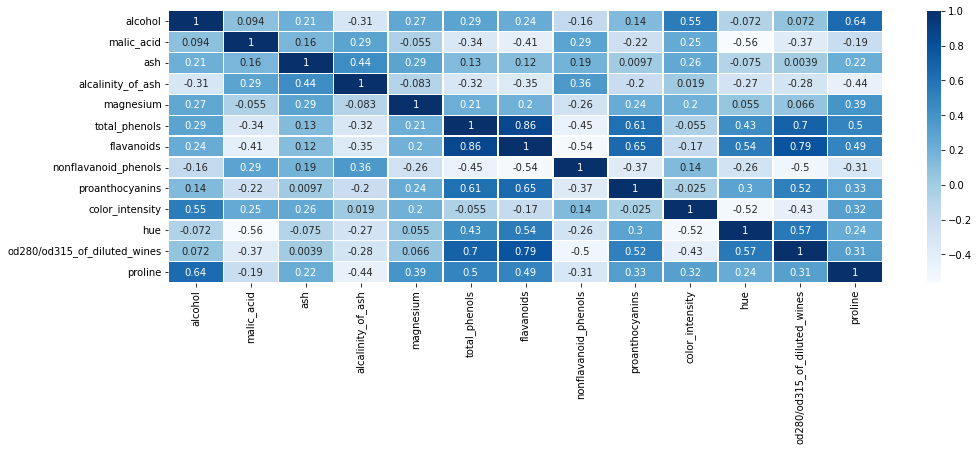

In [42]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
import seaborn as sb

corr = df.drop(["y"], axis=1).corr()
plt.figure(figsize=(16, 5))
sb.heatmap(
    corr,
    cmap="Blues",
    annot=True,
    linewidths=0.5,
)
# YOUR CODE HERE

In [43]:
# What is the highest correlation between features?
corr["flavanoids"]

alcohol                         0.236815
malic_acid                     -0.411007
ash                             0.115077
alcalinity_of_ash              -0.351370
magnesium                       0.195784
total_phenols                   0.864564
flavanoids                      1.000000
nonflavanoid_phenols           -0.537900
proanthocyanins                 0.652692
color_intensity                -0.172379
hue                             0.543479
od280/od315_of_diluted_wines    0.787194
proline                         0.494193
Name: flavanoids, dtype: float64

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


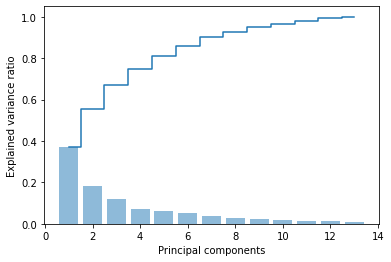

[0.36951469 0.18434927]


In [44]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)

plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.savefig("PCA_WINE.png", dpi=300)
plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)

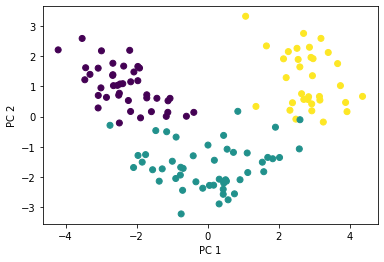

In [45]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.savefig("PCA_WINE_ULBL.png", dpi=300)
plt.show()

In [46]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE
pca_n = PCA(n_components=0.85)
students_pca_n = pca_n.fit_transform(X_train_std)
np.cumsum(pca_n.explained_variance_ratio_)

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639])

In [74]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(pca.explained_variance_ratio_)

[0.36951469 0.18434927 0.11815159]


In [63]:
sum([0.36951469, 0.18434927, 0.11815159])

0.6720155499999999

## Clustering

Let's see how many clusters does K-Means find.



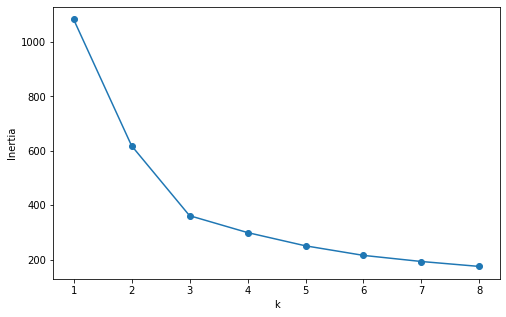

In [49]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE
inertias, sil = [], []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k)
    y_pred = kmeans.fit_predict(X_train_pca)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(X_train_pca, y_pred))

# Let's plot inertia vs number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), inertias, "o-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.savefig("elbow_moons.pdf", dpi=300)
plt.show()

In [50]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE
sil

[0.4021830494270091,
 0.4492555696539346,
 0.40104219014089343,
 0.401953802903204,
 0.34795329225807137,
 0.3068322103537098,
 0.31760883597845946]

3


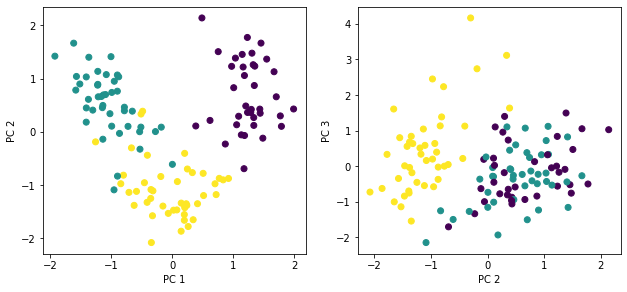

In [53]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE
X_std = StandardScaler().fit_transform(X_train_pca)
clusterer = KMeans(n_clusters=3)
clusterer.fit(X_std)
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16, 10))
for i in range(1, 3):
    plt.subplot(2, 3, i)
    plt.scatter(X_std[:, i - 1], X_std[:, i], c=clusterer.labels_)
    plt.xlabel("PC %d" % i)
    plt.ylabel("PC %d" % (i + 1))
plt.show()

4


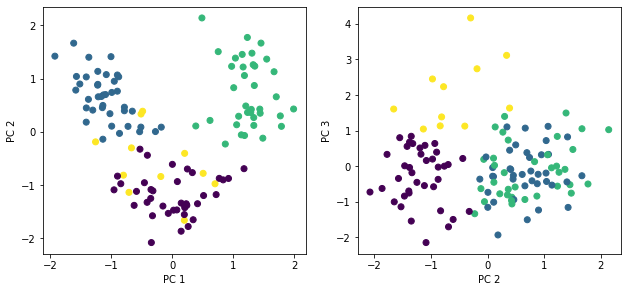

In [54]:
X_std = StandardScaler().fit_transform(X_train_pca)
clusterer = KMeans(n_clusters=4)
clusterer.fit(X_std)
print(len(set(clusterer.labels_)))  # how many clusters did it find?
# And plot them
plt.figure(figsize=(16, 10))
for i in range(1, 3):
    plt.subplot(2, 3, i)
    plt.scatter(X_std[:, i - 1], X_std[:, i], c=clusterer.labels_)
    plt.xlabel("PC %d" % i)
    plt.ylabel("PC %d" % (i + 1))
plt.show()

Now we can try to understand our clusters.

In [56]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE
X_train.shape

(124, 13)

In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE

Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!

In [ ]:
# df[[column1,column2]].corr().iloc[1,0]
# df[column].mean()

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


def std_pca(df, var=0.5):
    features = [col for col in df.columns if col != "y"]
    dfeature = df[features]
    sc = StandardScaler()
    df_std = sc.fit_transform(dfeature)
    pca_n = PCA(random_state=100, n_components=var)
    df_pca_n = pca_n.fit_transform(df_std)
    dfPCA = pd.DataFrame(
        data=df_pca_n,
        columns=["PC%d" % i for i in range(1, pca_n.components_.shape[0] + 1)],
    )
    try:
        dfPCA["y"] = df["y"]
    except:
        pass
    return dfPCA.to_numpy()

In [67]:
features = [col for col in df.columns if col != "y"]

In [71]:
dfeature = df[features]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [130]:
std_pca(df).shape

(178, 15)
(178, 2)
(178, 2)


(178, 3)

In [101]:
a.shape

(14, 3)

In [102]:
a.columns

Index(['PC1', 'PC2', 'y'], dtype='object')

In [117]:
y = std_pca(df)

In [114]:
print(y.astype(int) == df["y"].values)

False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [115]:
df["y"].values.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [119]:
y.shape

(14, 3)

In [120]:
df["y"].values.shape

(178,)